   Threads  GraphSize  Time(ms)  BestPathLen
0        1        500     36909      1431892
1        1        600     44387      2075564
2        1        700     53049      2232340
3        1        800     58691      2810656
4        1        900     46794      2968174
Baseline time for 1 thread: 36909


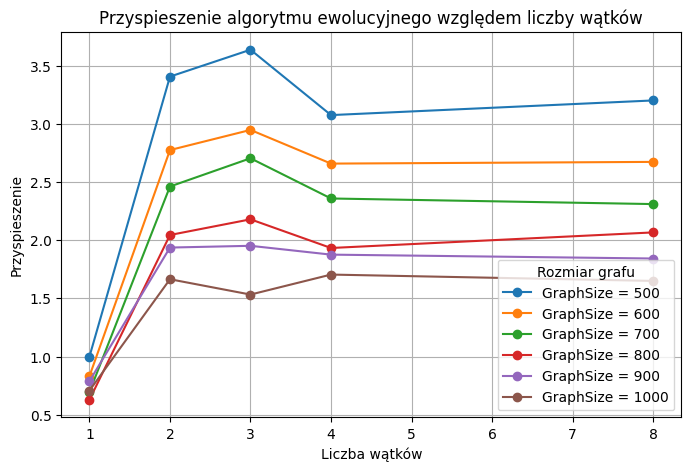

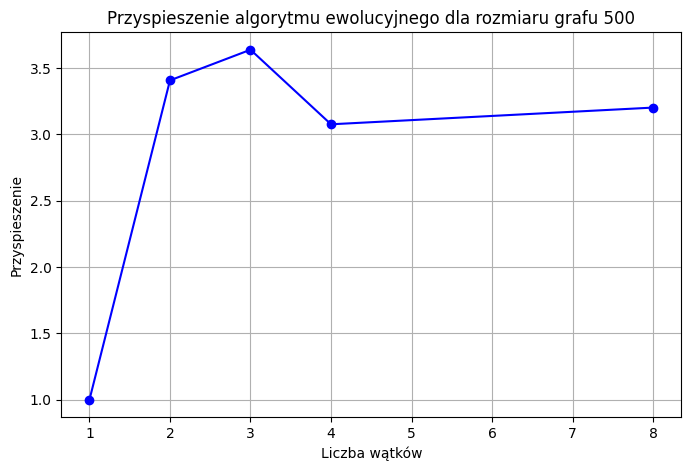

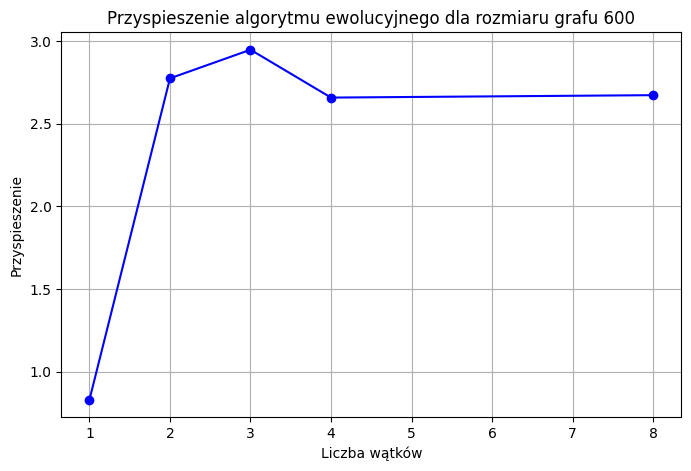

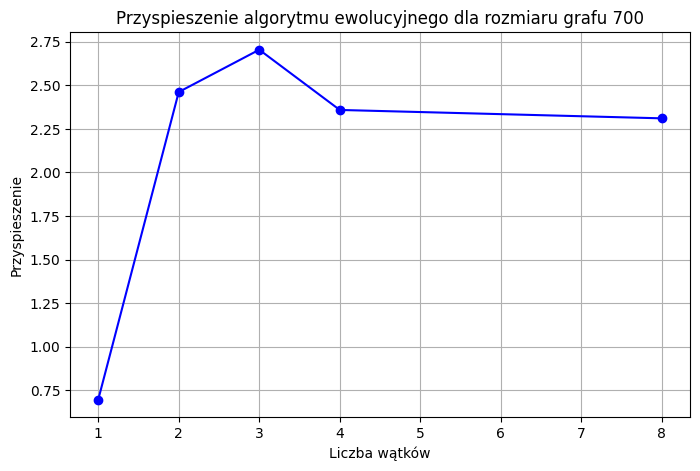

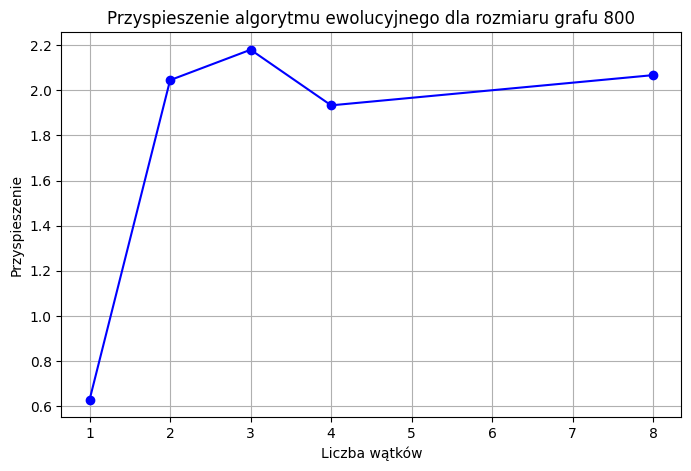

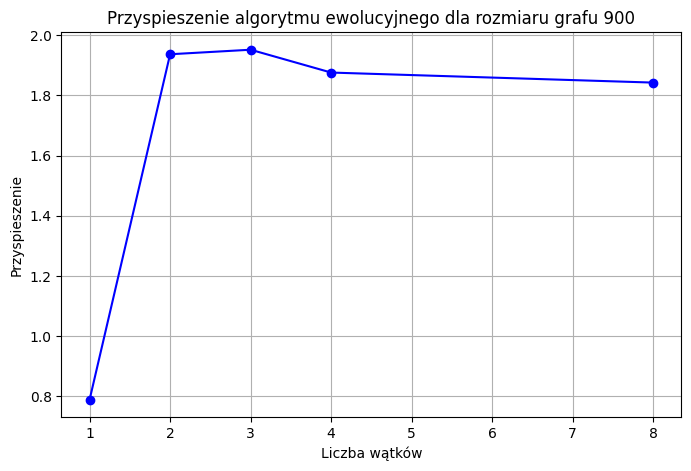

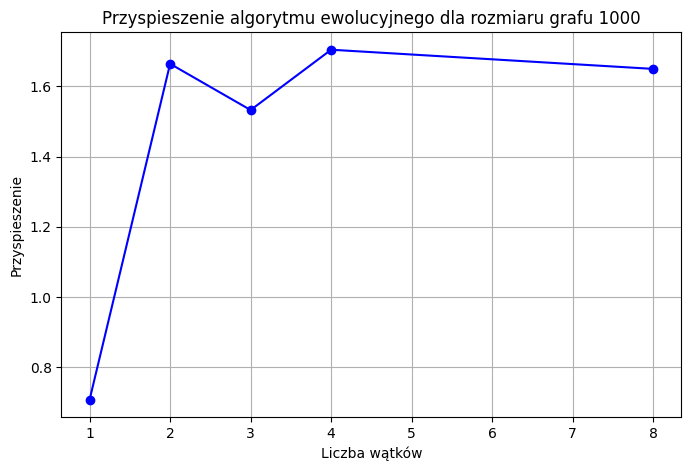

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Wyświetlanie wykresów w Jupyter Notebook
%matplotlib inline  

# Wczytanie danych
df = pd.read_csv("results.csv")
print(df.head()) 

# Obliczanie przyspieszenia
baseline_time = df[df["Threads"] == 1]["Time(ms)"].values[0]
df["Speedup"] = baseline_time / df["Time(ms)"]
print(f'Baseline time for 1 thread: {baseline_time}')

# Przyspieszenie względem rozmiaru grafu
plt.figure(figsize=(8, 5))
for graph_size in df["GraphSize"].unique():
    graph_df = df[df["GraphSize"] == graph_size]
    plt.plot(graph_df["Threads"], graph_df["Speedup"], marker='o', label=f'GraphSize = {graph_size}')
plt.xlabel("Liczba wątków")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie algorytmu ewolucyjnego względem liczby wątków")
plt.legend(title="Rozmiar grafu")
plt.grid()
plt.show()

# Przyspieszenie względem liczby wątków dla każdej wielkości grafu
graph_sizes = df["GraphSize"].unique()
for graph_size in graph_sizes:
    graph_df = df[df["GraphSize"] == graph_size]
    plt.figure(figsize=(8, 5))
    plt.plot(graph_df["Threads"], graph_df["Speedup"], marker='o', linestyle='-', color='b')
    plt.xlabel("Liczba wątków")
    plt.ylabel("Przyspieszenie")
    plt.title(f"Przyspieszenie algorytmu ewolucyjnego dla rozmiaru grafu {graph_size}")
    plt.grid()
    plt.show()


   Threads  GraphSize  Time(ms)  BestPathLen
0        1        500     36909      1431892
1        1        600     44387      2075564
2        1        700     53049      2232340
3        1        800     58691      2810656
4        1        900     46794      2968174
Baseline time for 1 thread: 36909


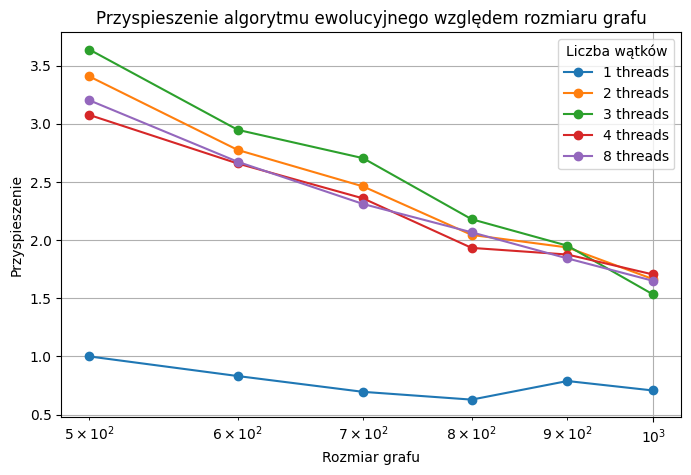

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Wyświetlanie wykresów w Jupyter Notebook
%matplotlib inline  

# Wczytanie danych
df = pd.read_csv("results.csv")
print(df.head()) 

# Obliczanie przyspieszenia
baseline_time = df[df["Threads"] == 1]["Time(ms)"].values[0]
df["Speedup"] = baseline_time / df["Time(ms)"]
print(f'Baseline time for 1 thread: {baseline_time}')

# Rysowanie wykresu przyspieszenia względem wielkości grafu
plt.figure(figsize=(8, 5))
for threads in df["Threads"].unique():
    thread_df = df[df["Threads"] == threads]
    plt.plot(thread_df["GraphSize"], thread_df["Speedup"], marker='o', label=f'{threads} threads')

plt.xlabel("Rozmiar grafu")
plt.ylabel("Przyspieszenie")
plt.title("Przyspieszenie algorytmu ewolucyjnego względem rozmiaru grafu")
plt.legend(title="Liczba wątków")
plt.grid()

plt.xscale('log')

plt.show()


   Processes  Threads  GraphSize  ExecutionTime  BestPathLength
0          2        4        500      42.127253         1587018
1          4        2        500      21.327570         1527438
2          8        1        500      10.295530         1567004
3          2        4        500      43.100142         1581516
4          2        4        600      50.545891         1957686


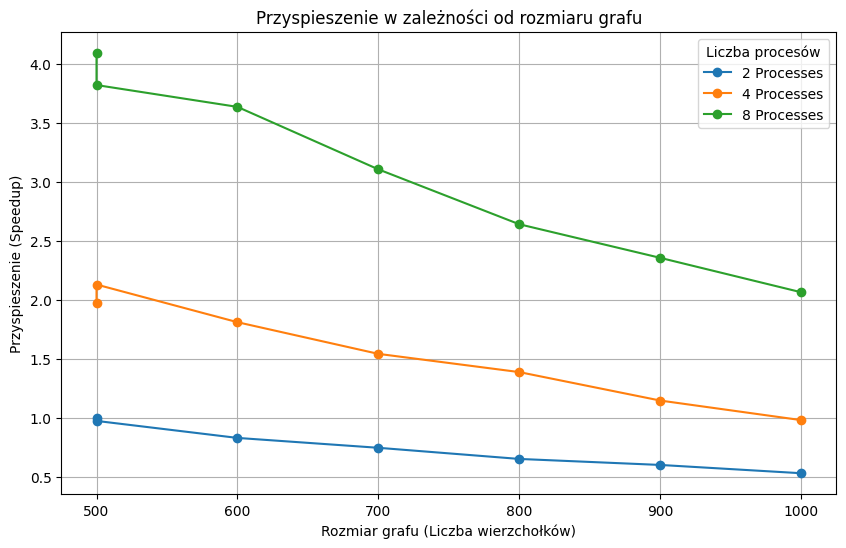

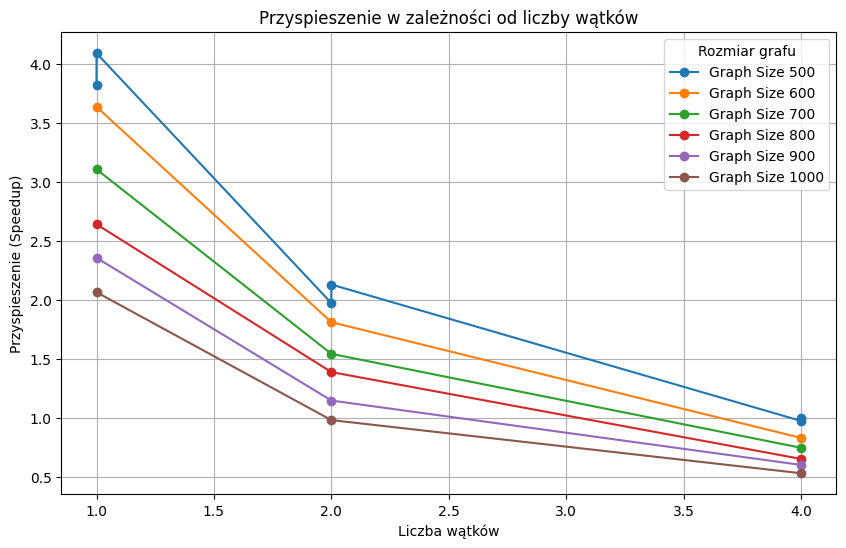

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv("results1.csv") 
print(df.head())  

# Sortowanie według liczby procesów
df = df.sort_values(by=["Processes"])

# Wyciągnięcie unikalnych wartości liczby procesów
processes = df["Processes"].unique()

# Znalezienie czasu wykonania dla jednego procesu (najmniejszej liczby procesów)
T1 = df[df["Processes"] == min(processes)]["ExecutionTime"].values[0]

# Obliczenie przyspieszenia (Speedup)
df["Speedup"] = T1 / df["ExecutionTime"]

# --- Wykres 1: Przyspieszenie w zależności od rozmiaru grafu ---

plt.figure(figsize=(10, 6))

# Rysowanie wykresu przyspieszenia w zależności od rozmiaru grafu dla różnych procesów
for process in processes:
    subset = df[df["Processes"] == process]
    plt.plot(subset["GraphSize"], subset["Speedup"], marker='o', label=f"{process} Processes")

plt.xlabel("Rozmiar grafu (Liczba wierzchołków)")
plt.ylabel("Przyspieszenie (Speedup)")
plt.title("Przyspieszenie w zależności od rozmiaru grafu")
plt.legend(title="Liczba procesów")
plt.grid(True)

plt.show()

# --- Wykres 2: Przyspieszenie w zależności od liczby wątków ---

plt.figure(figsize=(10, 6))

# Rysowanie wykresów przyspieszenia w zależności od liczby wątków dla różnych rozmiarów grafu
graph_sizes = df["GraphSize"].unique()

for graph_size in graph_sizes:
    subset = df[df["GraphSize"] == graph_size]
    plt.plot(subset["Threads"], subset["Speedup"], marker='o', label=f"Graph Size {graph_size}")

plt.xlabel("Liczba wątków")
plt.ylabel("Przyspieszenie (Speedup)")
plt.title("Przyspieszenie w zależności od liczby wątków")
plt.legend(title="Rozmiar grafu")
plt.grid(True)

plt.show()
